# Hand Gesture Recognition - Machine Learning Demo

Notebook này thực hiện toàn bộ quy trình: tải dữ liệu, huấn luyện, đánh giá và lưu mô hình nhận diện cử chỉ tay bằng các thuật toán ML phổ biến (Random Forest, SVM, KNN).

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [11]:
# Load và chuẩn bị dữ liệu
print("Loading extracted features...")
df = pd.read_csv('d:/HAND_GESTURE/Data.csv')
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of samples: {df.shape[0]}")
print(f"Classes: {sorted(df['label'].unique())}")
print(f"Class distribution:")
print(df['label'].value_counts())

# Tách đặc trưng và nhãn
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Loading extracted features...
Dataset shape: (4849, 70)
Number of features: 69
Number of samples: 4849
Classes: ['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']
Class distribution:
label
one                350
three              316
stop_inverted      311
four               300
mute               284
three2             283
two_up             281
ok                 280
stop               280
palm               275
peace              273
peace_inverted     266
rock               265
fist               247
two_up_inverted    233
dislike            230
like               200
call               175
Name: count, dtype: int64


In [12]:
# Làm sạch dữ liệu: loại bỏ dòng trùng lặp và xử lý giá trị thiếu
print(f"Trước khi làm sạch: {df.shape[0]} samples")
df = df.drop_duplicates()
print(f"Sau khi loại bỏ trùng lặp: {df.shape[0]} samples")
missing = df.isnull().sum().sum()
print(f"Số lượng giá trị thiếu: {missing}")
df = df.dropna()
print(f"Sau khi loại bỏ thiếu: {df.shape[0]} samples")

Trước khi làm sạch: 4849 samples
Sau khi loại bỏ trùng lặp: 4849 samples
Số lượng giá trị thiếu: 0
Sau khi loại bỏ thiếu: 4849 samples


In [13]:
# Chia dữ liệu train/test và scale đặc trưng
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: 3879
Test set size: 970


In [14]:
# Khởi tạo, huấn luyện và đánh giá các mô hình ML
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    if name == 'Random Forest':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Training Random Forest...
Random Forest Accuracy: 0.9505

Random Forest Classification Report:
                 precision    recall  f1-score   support

           call       0.97      1.00      0.99        35
        dislike       0.98      0.93      0.96        46
           fist       0.94      0.98      0.96        49
           four       0.95      0.93      0.94        60
           like       0.95      0.97      0.96        40
           mute       0.96      0.95      0.96        57
             ok       1.00      0.96      0.98        56
            one       0.97      0.99      0.98        70
           palm       0.98      0.96      0.97        55
          peace       0.95      0.95      0.95        55
 peace_inverted       0.96      0.92      0.94        53
           rock       1.00      1.00      1.00        53
           stop       0.84      0.91      0.87        56
  stop_inverted       0.85      0.92      0.88        62
          three       1.00      0.95      0.98  

In [15]:
# So sánh hiệu suất các mô hình và chọn mô hình tốt nhất
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")
best_model = max(results, key=results.get)
print(f"\nBest performing model: {best_model} ({results[best_model]:.4f})")


MODEL COMPARISON
Random Forest: 0.9505
SVM: 0.9588
KNN: 0.9309

Best performing model: SVM (0.9588)



Top 20 Most Important Features:
                              feature  importance
51                 index_middle_angle    0.056554
40                    thumb_mcp_angle    0.050483
48                    pinky_pip_angle    0.049639
42                    index_pip_angle    0.047711
46                     ring_pip_angle    0.042757
44                   middle_pip_angle    0.039055
9    index_tip_to_middle_tip_distance    0.038322
14     ring_tip_to_pinky_tip_distance    0.030527
50                  thumb_index_angle    0.027501
57   palm_center_to_ring_tip_distance    0.026134
58  palm_center_to_pinky_tip_distance    0.025966
52                  middle_ring_angle    0.025146
12    middle_tip_to_ring_tip_distance    0.024472
65                 thumb_pinky_spread    0.023861
7      thumb_tip_to_ring_tip_distance    0.023490
8     thumb_tip_to_pinky_tip_distance    0.022300
45                   middle_dip_angle    0.021021
54  palm_center_to_thumb_tip_distance    0.020369
62               

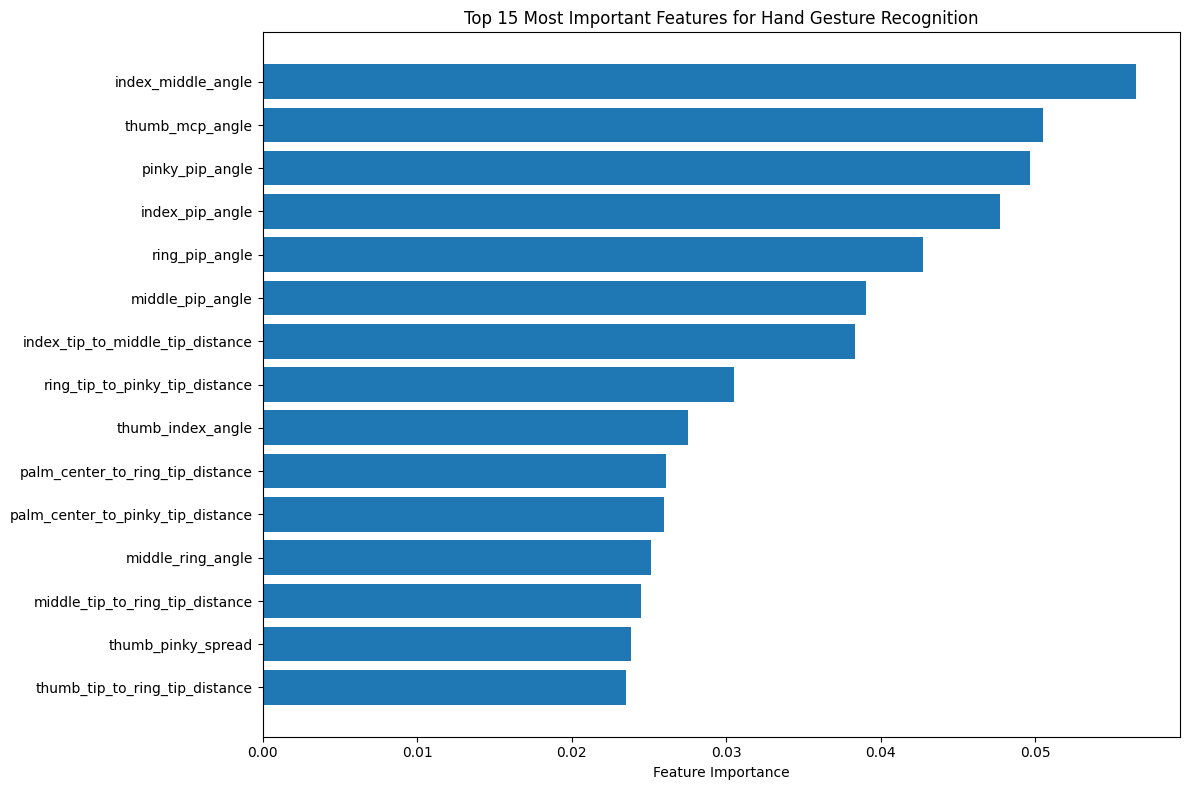

In [16]:
# Phân tích feature importance với Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)
print("\nTop 20 Most Important Features:")
print(feature_importance.head(20))
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for Hand Gesture Recognition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('d:/HAND_GESTURE/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

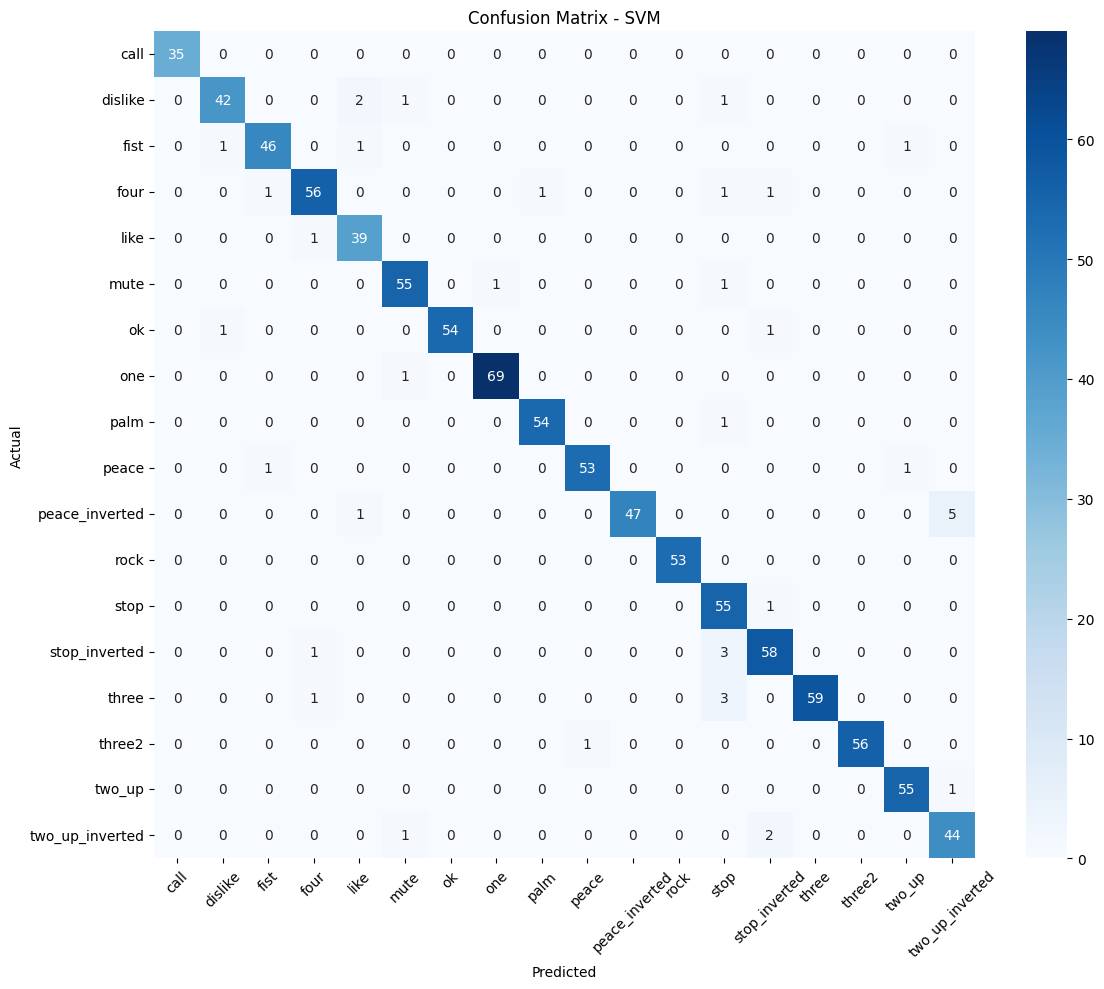

In [17]:
# Tạo confusion matrix cho mô hình tốt nhất
if best_model == 'Random Forest':
    y_pred_best = models[best_model].predict(X_test)
else:
    y_pred_best = models[best_model].predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f'd:/HAND_GESTURE/confusion_matrix_{best_model.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Demo dự đoán trên một vài mẫu test
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for i, idx in enumerate(sample_indices):
    print(f"\nSample {i+1}:")
    print(f"True label: {label_encoder.classes_[y_test[idx]]}")
    sample_rf = X_test.iloc[idx:idx+1]
    sample_scaled = X_test_scaled[idx:idx+1]
    print("Predictions:")
    rf_pred = models['Random Forest'].predict(sample_rf)[0]
    print(f"  Random Forest: {label_encoder.classes_[rf_pred]}")
    svm_pred = models['SVM'].predict(sample_scaled)[0]
    print(f"  SVM: {label_encoder.classes_[svm_pred]}")
    knn_pred = models['KNN'].predict(sample_scaled)[0]
    print(f"  KNN: {label_encoder.classes_[knn_pred]}")


Sample 1:
True label: one
Predictions:
  Random Forest: mute
  SVM: mute
  KNN: mute

Sample 2:
True label: peace_inverted
Predictions:
  Random Forest: peace_inverted
  SVM: peace_inverted
  KNN: peace_inverted

Sample 3:
True label: stop
Predictions:
  Random Forest: stop
  SVM: stop
  KNN: stop

Sample 4:
True label: peace
Predictions:
  Random Forest: peace
  SVM: peace
  KNN: peace

Sample 5:
True label: ok
Predictions:
  Random Forest: ok
  SVM: ok
  KNN: ok


In [19]:
# Lưu lại mô hình đã huấn luyện và các đối tượng cần thiết
model_data = {
    'models': models,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_names': list(X.columns),
    'results': results
}
with open('d:/HAND_GESTURE/trained_models_2.pkl', 'wb') as f:
    pickle.dump(model_data, f)
print(f"✅ Trained models saved to d:/HAND_GESTURE/trained_models_2.pkl")

✅ Trained models saved to d:/HAND_GESTURE/trained_models_2.pkl
